1. 색상에 대해서 '히스토그램' 그리기
2. 색상에 대한 '마스크' 적용하기

In [ ]:
#OPENCV 설치
!pip install opencv-python

In [ ]:
import os
import numpy as np
import cv2

import matplotlib.pyplot as plt

In [ ]:
image_path = '/wafer.jpg'

array([[[162, 162, 162],
        [126, 126, 126],
        [134, 134, 134],
        ...,
        [115, 115, 115],
        [110, 110, 110],
        [162, 162, 162]],

       [[139, 139, 139],
        [ 75,  75,  75],
        [ 74,  74,  74],
        ...,
        [  0,   0,   0],
        [ 12,  12,  12],
        [106, 106, 106]],

       [[120, 120, 120],
        [ 22,  22,  22],
        [ 21,  21,  21],
        ...,
        [  0,   0,   0],
        [  5,   5,   5],
        [112, 112, 112]],

       ...,

       [[117, 117, 117],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  1,   1,   1],
        [  1,   1,   1],
        [114, 114, 114]],

       [[108, 108, 108],
        [ 11,  11,  11],
        [  2,   2,   2],
        ...,
        [  1,   1,   1],
        [  6,   6,   6],
        [109, 109, 109]],

       [[158, 158, 158],
        [109, 109, 109],
        [106, 106, 106],
        ...,
        [114, 114, 114],
        [108, 108, 108],
        [161, 161, 161]]], dtype=uint8)
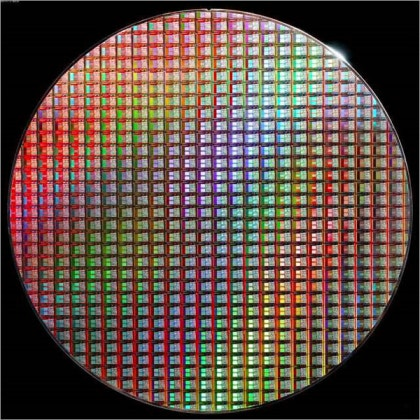

In [ ]:
image = cv2.imread(image_path)
image

array([[[162, 162, 162],
        [126, 126, 126],
        [134, 134, 134],
        ...,
        [115, 115, 115],
        [110, 110, 110],
        [162, 162, 162]],

       [[139, 139, 139],
        [ 75,  75,  75],
        [ 74,  74,  74],
        ...,
        [  0,   0,   0],
        [ 12,  12,  12],
        [106, 106, 106]],

       [[120, 120, 120],
        [ 22,  22,  22],
        [ 21,  21,  21],
        ...,
        [  0,   0,   0],
        [  5,   5,   5],
        [112, 112, 112]],

       ...,

       [[117, 117, 117],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  1,   1,   1],
        [  1,   1,   1],
        [114, 114, 114]],

       [[108, 108, 108],
        [ 11,  11,  11],
        [  2,   2,   2],
        ...,
        [  1,   1,   1],
        [  6,   6,   6],
        [109, 109, 109]],

       [[158, 158, 158],
        [109, 109, 109],
        [106, 106, 106],
        ...,
        [114, 114, 114],
        [108, 108, 108],
        [161, 161, 161]]], dtype=uint8)
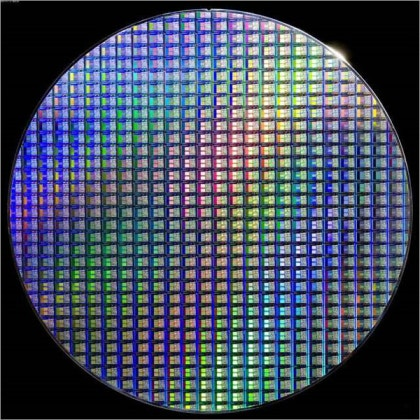

In [ ]:
src  = image.copy()
cv2.cvtColor(src, cv2.COLOR_BGR2RGB)

array([[162, 126, 134, ..., 115, 110, 162],
       [139,  75,  74, ...,   0,  12, 106],
       [120,  22,  21, ...,   0,   5, 112],
       ...,
       [117,   0,   0, ...,   1,   1, 114],
       [108,  11,   2, ...,   1,   6, 109],
       [158, 109, 106, ..., 114, 108, 161]], dtype=uint8)
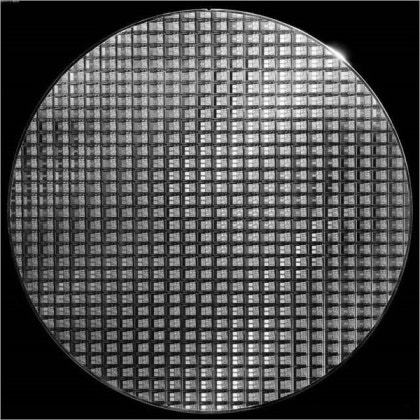

In [ ]:
cv2.cvtColor(src, cv2.COLOR_BGR2GRAY) # gray-scale 회색

In [ ]:
src = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY) # gray-scale 회색

# cv2.calcHist() 히스토그램 계산 함수
hist = cv2.calcHist([src],[0], None, [256],[0,256])
# 0번 채널, None: 마스크 설정이 None(전체 이미지 사용)
# [256] bin(계급구간)개수(0-255, 총 256개 구간), [0,256] 픽셀의 범위 (0-255)

hist[250]
# 밝기 값이 250인 픽셀 개수

array([30.], dtype=float32)

In [ ]:
hist[0, 0]
# 행렬의 가장 첫번째 값

np.float32(10619.0)

In [ ]:
# x 좌표 (픽셀 값 범위 0-255)
# 'channels'는 분석할 채널 (예: 그레이스케일에서는 [0])을 지정,
# 'histSize'는 히스토그램 구간의 수 (0~255로 256개 구간),
# 'histRange'는 픽셀 값 범위 (0~255)를 지정합니다.

hist_size = [256]
hist_range = [0, 256] #파이썬 사용(범위 지정시, 마지막 뒷 숫자 미포함)

# opencv 함수 활용
#cv2.calcHist(이미지, 채널 번호, None, x가 몇개로 나뉘어야 하는지, x의 범위)
hist = cv2.calcHist([src],[0], None, hist_size, hist_range)

In [ ]:
# hist

# 어느 픽셀이 제일 많이 있는가(최대값 카운트)
# 최대값을 의미 : histMax 기준으로 다른 모든 그래프를 그림

hist_max = np.max(hist)
hist_max

np.float32(27511.0)

In [ ]:
# 자 무작정 따라해 봐요. 그래서 강제로 이해하세요
# 컴퓨터 입장에서 y값이 클수록 아래, 작을 수록 위
# 컴퓨터는 y 가 아래로 늘어나 있죠. 막대를 위로 올리려면, 전체 높이(100)이라면, 전체 높이에서 빼야 함

# 1단계: 현재 밝기값의 픽셀 개수
x = 0
hist[x, 0] # 10619개

np.float32(10619.0)

In [ ]:
# 2단계: 최대값 대비 비율 (0-1 사이)
# 3단계 : 퍼센트로 변환(0-100)
hist[x, 0] * 100 / hist_max # 38.599106

np.float32(38.599106)

In [ ]:
# 4단계 : 정수로 변환
int(hist[x, 0] * 100 / hist_max) # 38

38

In [ ]:
# 5단계: y 좌표 계산 (아래에서 위)
# 왜 100에서 빼지? 컴퓨터 y축이 뒤집혀 있잖아
100 - int(hist[x, 0] * 100 / hist_max) # 62

62

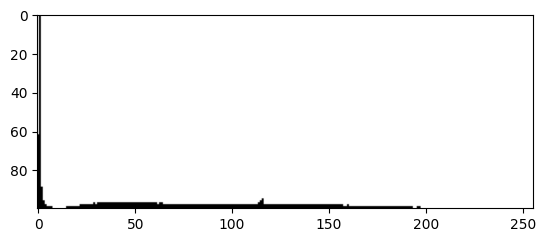

In [ ]:
# 그래프 그릴 도화지
# 255(흰색)으로 채운 100*256 도화지 준비해 주세요

image_background = np.full((100,256),255,dtype=np.uint8)

for x in range(256):
  # 시작점 pt1
  pt1 = (x, 100)
  # 컴퓨터는 y축이 뒤집혀 있어. 높이 100인 그림의 경우 디지털 100 == 사람이 생각하는 0이 됨

  # 끝점 pt2
  pt2 = (x, 100-int(hist[x,0]*100 / hist_max))

  #cv2.line(이미지, 시작점, 끝점, 색상)
  cv2.line(image_background, pt1, pt2, 0)

plt.imshow(image_background, cmap='gray')
plt.show()




pt= (x, 100) 의미

- (x, 100) = (가로 위치, 세로 위치)

- x = 0   >>   (0, 100) (밝기 0 (왼쪽 끝) 아래쪽)
- x = 50  >>  (50, 100) (밝기 50 위치에서 아래쪽)
- x = 100 >> (100, 100) (밝기 100 위치에서 아래쪽)

일반적으로 히스토그램 (밝기, 개수) 형태임

가로축(x축) : 픽셀 밝기 값 위치
- x=0 (아주 어두운 픽셀)
- x= 128 (중간 밝기)
- x = 255 (아주 밝은 픽셀)

세로축(y축) : 픽셀의 개수


마스크 (색상 마스크)

array([[[  0,   0, 162],
        [  0,   0, 126],
        [  0,   0, 134],
        ...,
        [  0,   0, 115],
        [  0,   0, 110],
        [  0,   0, 162]],

       [[  0,   0, 139],
        [  0,   0,  75],
        [  0,   0,  74],
        ...,
        [  0,   0,   0],
        [  0,   0,  12],
        [  0,   0, 106]],

       [[  0,   0, 120],
        [  0,   0,  22],
        [  0,   0,  21],
        ...,
        [  0,   0,   0],
        [  0,   0,   5],
        [  0,   0, 112]],

       ...,

       [[  0,   0, 117],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   1],
        [  0,   0,   1],
        [  0,   0, 114]],

       [[  0,   0, 108],
        [  0,   0,  11],
        [  0,   0,   2],
        ...,
        [  0,   0,   1],
        [  0,   0,   6],
        [  0,   0, 109]],

       [[  0,   0, 158],
        [  0,   0, 109],
        [  0,   0, 106],
        ...,
        [  0,   0, 114],
        [  0,   0, 108],
        [  0,   0, 161]]], dtype=uint8)
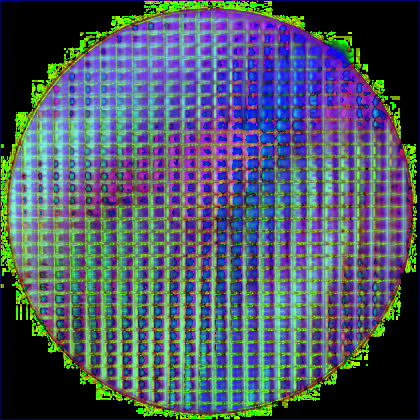

In [ ]:
# 색공간(HSV)

image = cv2.imread(image_path)
# image
cv2.cvtColor(image, cv2.COLOR_BGR2HSV) # HSV(Hue, Satuaration,Value)
# 색상 분리하기 위해

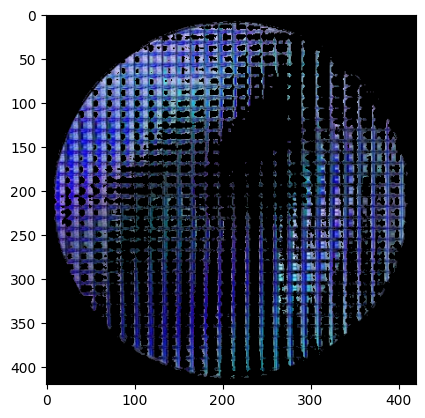

In [ ]:
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV) # HSV(Hue, Satuaration,Value)

# 파란색만 추출하고 싶어요
# 파란색 범위(2개) 내가 지정
# HSV(Hue 색상, Satuaration 채도,Value 값)
lower_blue = np.array([90,50,50])
high_blue = np.array([130,255,255])

# 마스크 색상
mask = cv2.inRange(hsv, lower_blue, high_blue)
# low-high 사이에 있는 값은 흰색, 검은색

# AND 연산
# (mask) 해당하는 흰색 부분만 남기고 싶어요
# (mask) 밖에 있는 거 (검은색) >> 검은색 으로
dst = cv2.bitwise_and(image, image, mask=mask)

dst = cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)
plt.imshow(dst)
plt.show()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)
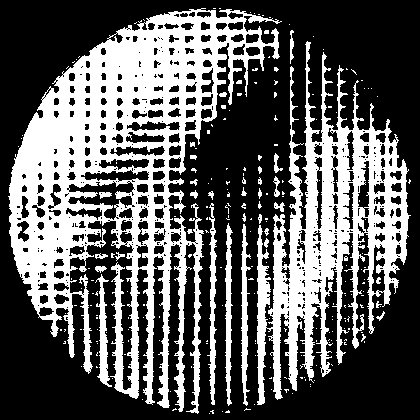

In [ ]:
# 마스크 색상
cv2.inRange(hsv, lower_blue, high_blue)
# low-high 사이에 있는 값은 흰색, 검은색

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)
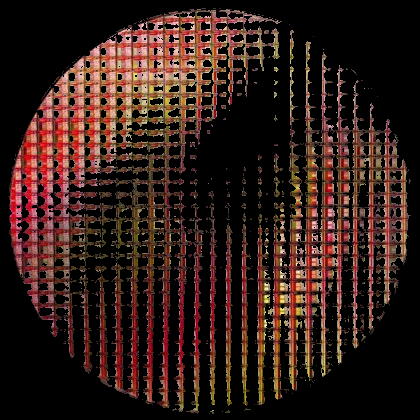

In [ ]:
cv2.bitwise_and(image, image, mask=mask)

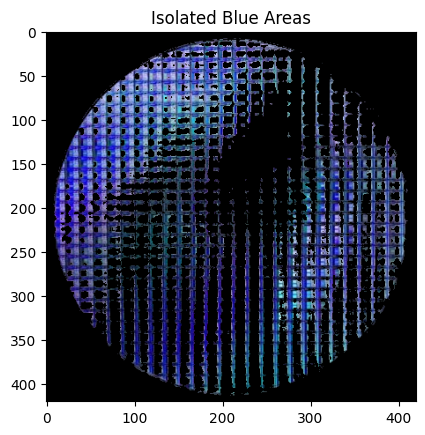

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread(image_path)
src = image.copy()
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Define the blue color range in HSV
lower_blue = np.array([90, 50, 50])
high_blue = np.array([130, 255, 255])

# Create the mask
mask = cv2.inRange(hsv, lower_blue, high_blue)

# Apply the mask to the original image
dst = cv2.bitwise_and(src, src, mask=mask)

# Convert the final result to RGB for displaying with matplotlib
dst_rgb = cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)

# Display the image
plt.imshow(dst_rgb)
plt.title('Isolated Blue Areas')
plt.show()

In [ ]:
# eos